# Recurrent Neural Network (RNN)

- RNNs are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.
- This is the reason why they are the preferred algorithm for sequential data like time series, speech, text, financial data, audio, video, weather, and much more because they can form a much deeper understanding of a sequence and its context, compared to other algorithms.
- Not only feeds output but also gives feedback into itself because RNN has internal memory.
- Temporal loop feeds itself.


   ![Description de l'image](./images/image.png)

- They have memory. Short term memory remembers what happened on the previous node.
- Why is it important to remember the past? Because we learn on what we have learned. You can think of RNN as the same logic.

![Description de l'image](./images/image1.png)

- Let's look at example RNN structures
- One to Many

    Music Generation: Initially, the model's input is a specific note or chord. The model takes the input and predicts the next note or chord. The predicted note or chord becomes the input for the next step. This process continues over a certain duration, creating a sequence of consecutive notes or chords.

![Description de l'image](./images/image2.png)

- Many to One

    Speech Emotion Recognition: This sequence encodes information about how the sound changes over time and which audio features might indicate a particular emotional state. As the RNN progresses through the entire sequence, it attempts to understand the patterns and changes in the audio features across the sequence. The hidden state or output at the final time step represents the overall emotional content of the entire sequence, allowing you to predict the emotional state based on this output.

![Description de l'image](./images/image3.png)

- Many to Many

    Translate: In this case, the input sentence is given in English, and the output sentence is generated in Turkish. Each word from the input sentence is taken, and the corresponding Turkish word is generated. "Many to Many" RNN models are particularly effective when dealing with sequential data on both input and output sides. These models can help capture complex relationships in various applications.
    
![Description de l'image](./images/image4.png)

- RNN has short term memory but LSTM can have long term memory.

- Exploiding Gradients: A situation where the gradient is too large. It gives importance to certain weights unnecessarily.
- Vanishing Gradients: A situation where the gradient is too small. Model learns slowly.
- Gradient: Change in weights according to cost.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:


# Importing the training set
dataset_train = pd.read_csv('./data/Google_Stock_Price_Train.xls')



In [7]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
train = dataset_train.loc[:, ["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

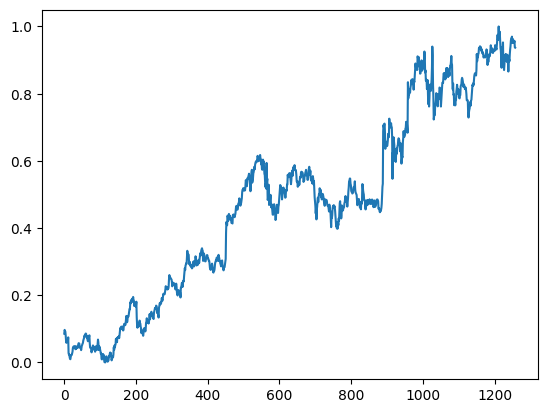

In [10]:
plt.plot(train_scaled)
plt.show()


In [11]:


# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)



![Description de l'image](./images/image5.png)


In [12]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train


array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [13]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [15]:
# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

2024-10-30 19:27:11.646287: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - loss: 0.4834
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.2593
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.2113
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.1628
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - loss: 0.1348
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0932
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0806
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - loss: 0.0687
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0562
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0555
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0411
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - loss: 0.0388
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - loss: 0.0336
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0280
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 

In [16]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('./data/Google_Stock_Price_Test.xls')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [17]:


real_stock_price = dataset_test.loc[:, ["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [18]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  # min max scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


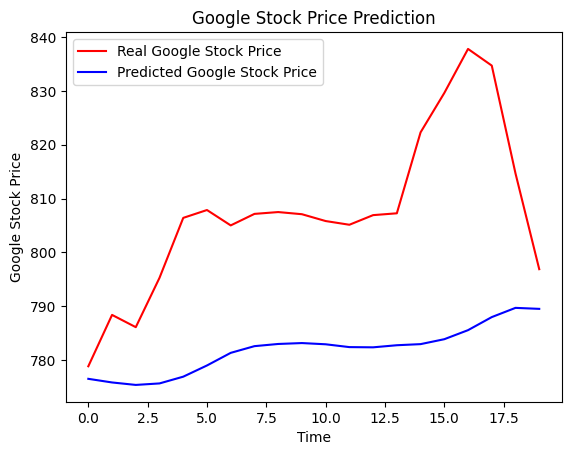

In [19]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
# epoch = 250 daha güzel sonuç veriyor.